In [41]:
import numpy as np
import matplotlib.pyplot as plt

### Define the rotational flow components: u = -y, v = x


In [42]:
def u_rotational(x, y):
    return -y

def v_rotational(x, y):
    return x

### Define the irrotational flow components: u = -2x, v = -2y


In [43]:
def u_irrotational(x, y):
    return -2 * x

def v_irrotational(x, y):
    return -2 * y

### Set up the grid 


In [44]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 20)
y = np.linspace(-2 * np.pi, 2 * np.pi, 20)
X, Y = np.meshgrid(x, y)

In [45]:
# Compute the vector components at each grid point
U_rotational = u_rotational(X, Y)
V_rotational = v_rotational(X, Y)

U_irrotational = u_irrotational(X, Y)
V_irrotational = v_irrotational(X, Y)

### Compute the divergence for both flows


In [46]:
dx = x[1] - x[0]
dy = y[1] - y[0]

In [47]:
# Numerical partial derivatives for rotational flow
du_rot_dx = (u_rotational(X + dx, Y) - u_rotational(X - dx, Y)) / (2 * dx)
dv_rot_dy = (v_rotational(X, Y + dy) - v_rotational(X, Y - dy)) / (2 * dy)
div_rotational = du_rot_dx + dv_rot_dy

In [48]:
# Numerical partial derivatives for irrotational flow
du_irr_dx = (u_irrotational(X + dx, Y) - u_irrotational(X - dx, Y)) / (2 * dx)
dv_irr_dy = (v_irrotational(X, Y + dy) - v_irrotational(X, Y - dy)) / (2 * dy)
div_irrotational = du_irr_dx + dv_irr_dy

In [49]:
# Check if the divergence is close to zero for rotational flow
div_rotational_check = np.allclose(div_rotational, 0, atol=1e-6)

# Check the divergence of the irrotational flow
div_irrotational_check = np.allclose(div_irrotational, 0, atol=1e-6)

if div_rotational_check:
    print("The divergence is zero (or very close to zero) for rotational flow.")
else:
    print("The divergence is not zero for rotational flow.")

if div_irrotational_check:
    print("The divergence is zero (or very close to zero) for irrotational flow.")
else:
    print("The divergence is not zero for irrotational flow.")


The divergence is zero (or very close to zero) for rotational flow.
The divergence is not zero for irrotational flow.


### Plot the streamlines for both flows


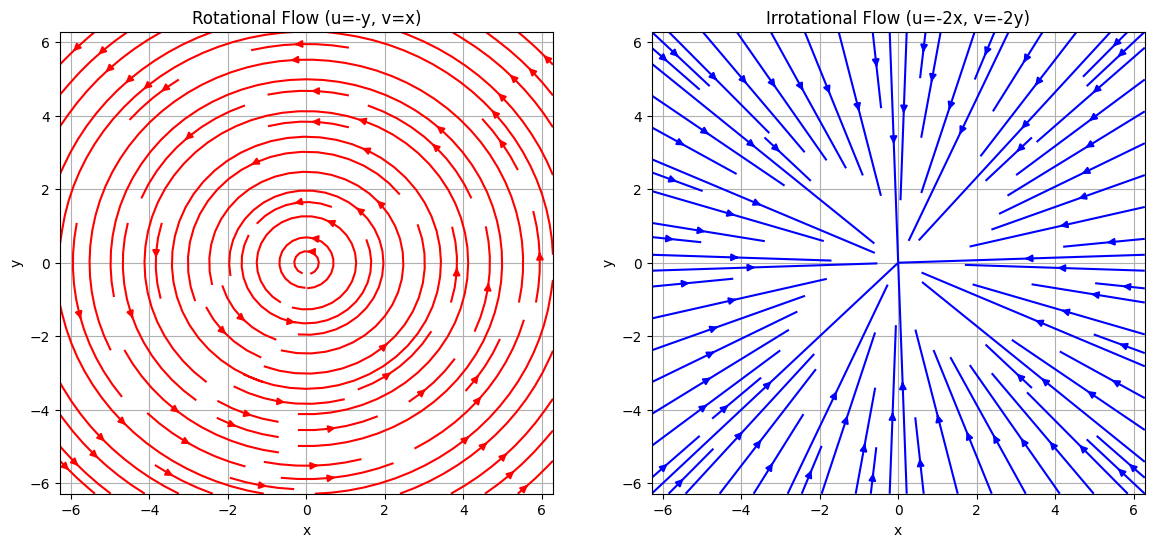

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Rotational flow streamlines
axs[0].streamplot(X, Y, U_rotational, V_rotational, color='r', linewidth=1.5)
axs[0].set_title('Rotational Flow (u=-y, v=x)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].grid(True)

# Irrotational flow streamlines
axs[1].streamplot(X, Y, U_irrotational, V_irrotational, color='b', linewidth=1.5)
axs[1].set_title('Irrotational Flow (u=-2x, v=-2y)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].grid(True)

plt.show()